In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [112]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [113]:
crypto_currency = 'BTC'
against_currency = 'USD'
data_source = 'yahoo'
start=dt.datetime(2016, 1, 1)
end=dt.datetime.now()
prediction_days = 60
future_day = 30

In [114]:
import yfinance as yf

data = yf.download(f'{crypto_currency}-{against_currency}', start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [115]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


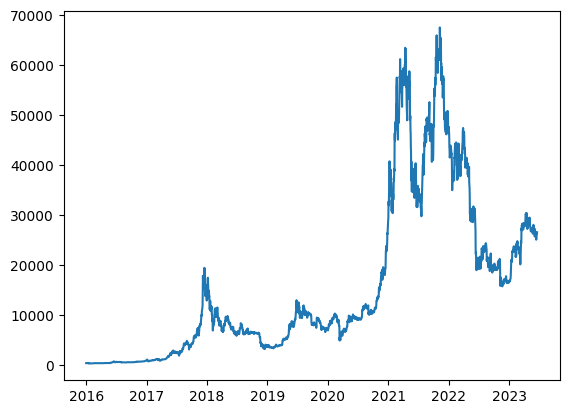

In [116]:
plt.plot(data['Close'])

In [117]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [118]:
scaled_data

array([[0.00104167],
       [0.00102834],
       [0.00097734],
       ...,
       [0.38906805],
       [0.38647198],
       [0.39049053]])

In [119]:
X_train, y_train=[],[]
for x in range(prediction_days, len(scaled_data)-future_day):
    X_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x+future_day,0])
print(X_train)
print(y_train)

[array([1.04167292e-03, 1.02833968e-03, 9.77344526e-04, 1.02317641e-03,
       1.00634650e-03, 9.63863251e-04, 1.39454655e-03, 1.32285289e-03,
       1.23923965e-03, 1.24489427e-03, 1.25139718e-03, 1.06185055e-03,
       1.01246250e-03, 9.81734443e-04, 0.00000000e+00, 3.45299923e-04,
       2.67371279e-04, 3.39823765e-04, 2.35378056e-04, 8.31799706e-04,
       6.83471623e-04, 2.70243094e-04, 3.44630105e-04, 5.74978852e-04,
       4.07648833e-04, 4.14002793e-04, 4.55950188e-04, 2.37461530e-04,
       2.25333968e-04, 2.07194849e-04, 6.60095209e-05, 1.29831576e-04,
       1.50545066e-04, 8.35982547e-05, 3.75923538e-04, 3.30612976e-04,
       1.81407091e-04, 1.82865250e-04, 1.35649681e-04, 1.74070883e-04,
       2.57698656e-04, 2.28012331e-04, 2.96596223e-04, 4.09642392e-04,
       6.38354513e-04, 5.33521899e-04, 6.42193591e-04, 7.73646807e-04,
       8.63688027e-04, 8.40058218e-04, 1.08378425e-03, 1.10809886e-03,
       1.09247417e-03, 8.39328912e-04, 9.02109230e-04, 8.95993680e-04,
     

In [120]:
X_train, y_train=np.array(X_train), np.array(y_train)
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train=y_train.reshape(y_train.shape[0], 1)

In [121]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

X_train.shape:  (2637, 60, 1)
y_train.shape:  (2637, 1)


In [122]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=50))
model.add(Dropout(rate=0.2))
model.add(Dense(units=32))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))


In [123]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
83/83 [==============================] - 14s 54ms/step - loss: 0.0161
Epoch 2/25
83/83 [==============================] - 5s 57ms/step - loss: 0.0095
Epoch 3/25
83/83 [==============================] - 6s 76ms/step - loss: 0.0085
Epoch 4/25
83/83 [==============================] - 5s 63ms/step - loss: 0.0079
Epoch 5/25
83/83 [==============================] - 5s 64ms/step - loss: 0.0075
Epoch 6/25
83/83 [==============================] - 4s 53ms/step - loss: 0.0079
Epoch 7/25
83/83 [==============================] - 5s 57ms/step - loss: 0.0073
Epoch 8/25
83/83 [==============================] - 5s 56ms/step - loss: 0.0072
Epoch 9/25
83/83 [==============================] - 5s 57ms/step - loss: 0.0067
Epoch 10/25
83/83 [==============================] - 5s 54ms/step - loss: 0.0073
Epoch 11/25
83/83 [==============================] - 5s 54ms/step - loss: 0.0072
Epoch 12/25
83/83 [==============================] - 4s 53ms/step - loss: 0.0071
Epoch 13/25
83/83 [=================

In [124]:
test_start=dt.datetime(2020, 1, 1)
test_end=dt.datetime.now()
test_data=yf.download(f'{crypto_currency}-{against_currency}', start=test_start, end=test_end)
actual_prices=test_data['Close'].values
scaled_actual_prices=scaler.fit_transform(actual_prices.reshape(-1,1))
scaled_actual_prices

[*********************100%***********************]  1 of 1 completed


array([[0.03561545],
       [0.03218546],
       [0.03792726],
       ...,
       [0.34410943],
       [0.34132231],
       [0.34637642]])

In [125]:
total_data=pd.concat((data['Close'], test_data['Close']), axis=0)
model_inputs=total_data[len(total_data)-len(test_data)-prediction_days:].values
model_inputs=scaler.fit_transform(model_inputs.reshape(-1,1))
X_test=[]
y_test=[]
for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x])
    y_test.append(model_inputs[x])

X_test, y_test=np.array(X_test), np.array(y_test)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_test=y_test.reshape(y_test.shape[0], 1)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_test.shape:  (1266, 60, 1)
y_test.shape:  (1266, 1)


In [126]:
y_predict=model.predict(X_test)
y_predict=scaler.fit_transform(y_predict)

40/40 [==============================] - 2s 18ms/step


In [127]:
y_predict.shape

(1266, 1)

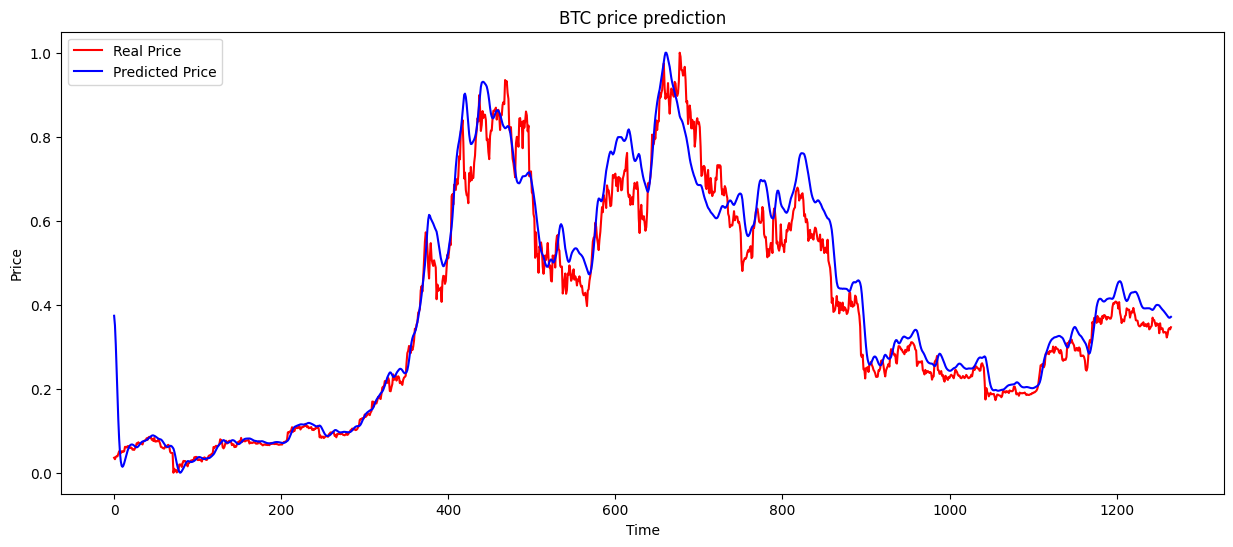

In [128]:
figure=plt.figure(figsize=(15,6))
plt.plot(scaled_actual_prices, color='red', label='Real Price')
plt.plot(y_predict, color='blue', label='Predicted Price')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()


In [129]:
real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1), 0]]
real_data=np.array(real_data)
real_data=real_data.reshape(real_data.shape[0], real_data.shape[1], 1)
prediction=model.predict(real_data)
scaler.fit_transform(actual_prices.reshape(-1,1))
prediction=scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")  

1/1 [==============================] - 1s 1s/step
Prediction: [[25817.443]]
